## Homework 13: NLP
### Zain Ul Haq
#### zh05616@st.habib.edu.pk

In [4]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
from tika import parser

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
#Extract all parts of speech from any text
chunker = RegexpParser("""
                       NP: {<DT>?<JJ>*<NN>}    #To extract Noun Phrases
                       P: {<IN>}               #To extract Prepositions
                       V: {<V.*>}              #To extract Verbs
                       PP: {<P> <NP>}          #To extract Prepostional Phrases
                       VP: {<V> <NP|PP>*}      #To extarct Verb Phrases
                       """)

# Part 1: NER

In [6]:
nlp = en_core_web_sm.load()

In [7]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
        return " ".join(re.split(r'[\n\t]+', soup.get_text()))

**Article** link: [https://jamesclear.com/creative-thinking'](https://jamesclear.com/creative-thinking')

In [8]:
ny_bb = url_to_string('https://jamesclear.com/creative-thinking')
article = nlp(ny_bb)
len(article.ents)

129

### this article has 129 words

In [9]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'ORG': 27,
         'DATE': 22,
         'CARDINAL': 28,
         'PERSON': 30,
         'LOC': 1,
         'GPE': 7,
         'PERCENT': 8,
         'QUANTITY': 2,
         'TIME': 2,
         'PRODUCT': 1,
         'MONEY': 1})

### the article is talking about some organisations 27 times, and it has some dates 22 times.

In [10]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Newton', 9), ('one', 5), ('Isaac Newton', 3)]

### As we can see the article is talking about Isaac Newton most commonly

In [11]:
sentences = [x for x in article.sents]
print(sentences[10])

2 What most people forget, however, is that Newton worked on his ideas about gravity for nearly twenty years until, in 1687, he published his groundbreaking book, The Principia: Mathematical Principles of Natural Philosophy.


In [12]:
displacy.render(nlp(str(sentences[10])), jupyter=True, style='ent')

In [13]:
dict([(str(x), x.label_) for x in nlp(str(sentences[10])).ents])

{'2': 'CARDINAL',
 'Newton': 'ORG',
 'nearly twenty years': 'DATE',
 '1687': 'DATE',
 'Principia': 'ORG'}

Lemmatization

In [14]:
displacy.render(nlp(str(sentences)), jupyter=True, style='ent')

### The above results show that the algorithm is finding as much NER in the article. ORG is any sort of organization, or some company name
### Many ORGs like Liquid Web Forms, Harvard Business Review, The Creativity Crisis
### "years" and "decades" are defined as Dates
### "Isaac Newton" is defined as Person.

# Part 2: PDF Parser

In [16]:
raw = parser.from_file('fpsyg-11-01246.pdf')

2023-12-14 07:00:07,464 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2023-12-14 07:00:08,001 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2023-12-14 07:00:08,338 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2023-12-14 07:00:13,347 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


PDF is attached in the file. 'fpsyg-11-01246.pdf'

Text Summarization

In [19]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et", "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower() not in stopwords]

# remove punctuation, count raw words
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]

filtered_word_freq = nltk.FreqDist(clean_words)

In [ ]:
filtered_word_freq.most_common(25)

[('https', 63),
 ('music', 57),
 ('Music', 34),
 ('al', 23),
 ('doi', 22),
 ('musical', 20),
 ('study', 18),
 ('research', 14),
 ('http', 14),
 ('Welch', 13),
 ('//www.frontiersin.org/journals/psychology', 13),
 ('health', 12),
 ('learning', 12),
 ('al.', 11),
 ('University', 10),
 ('benefits', 10),
 ('people', 10),
 ('programme', 10),
 ('well-being', 9),
 ('activity', 9),
 ('also', 9),
 ('social', 9),
 ('psychological', 9),
 ('articles', 9),
 ('Development', 8)]

the most common usefull word in the pdf is "music" with frequency of 57, followed by Music which is 34 making it 91.

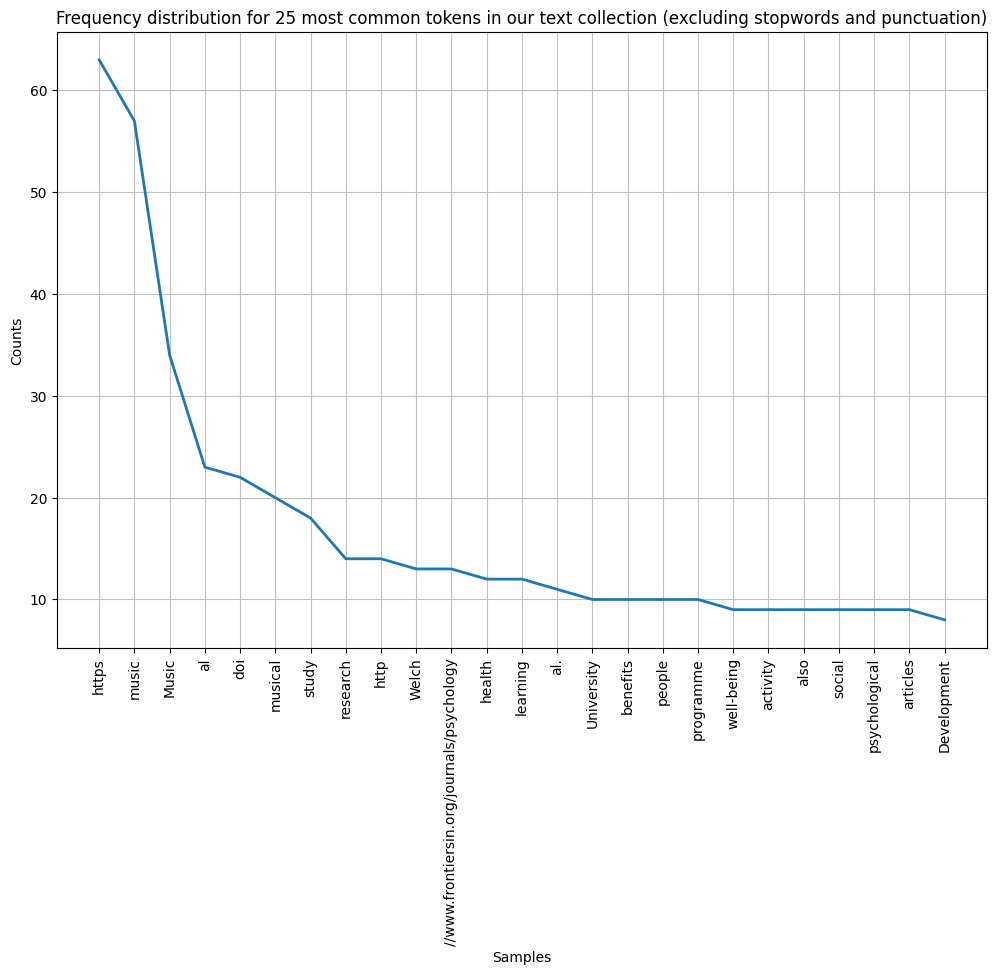

<Axes: title={'center': 'Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [20]:
filtered_word_freq.plot(25,title='Frequency distribution for 25 most common tokens in our text collection (excluding stopwords and punctuation)')

graph is for word frequency of top 25 words in the pdf. At the top we have "http" with frequency between 65 and the second most common word is "COVID-19" with frequency around 57.

tech 2

In [22]:
import yake

In [23]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 3
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Cheryl Diane Metcalf', 0.00041905950797940404)
('Kingdom Pamela Burnard', 0.0011641155205392465)
('Music', 0.001472193061849749)
('United Kingdom Reviewed', 0.0031956222828029594)
('United Kingdom Pamela', 0.0031956222828029594)
('George Waddell', 0.005546774933967507)
('Cheryl Diane', 0.005584179886904716)
('Diane Metcalf', 0.005584179886904716)
('Pamela Burnard', 0.005584179886904716)
('music education', 0.009407255409765003)
('Oxford University Press', 0.00999255633122824)
('Human Development', 0.010127189585103155)
('United Kingdom', 0.01041862810766466)
('music therapy', 0.011557474438305109)
('doi', 0.013187816629824439)
('musical', 0.013555772435874129)
('Welch', 0.015009136291872732)
('Well-Being EDITORIAL published', 0.015293162571271932)
('Kingdom Reviewed', 0.01538184195551543)
('Kingdom Pamela', 0.01538184195551543)


the above results shows the mos important keywords in the pdf.
the above result show that most important keyword according to Yake algorithm is "Cheryl Diane Metcalf"

tech 3

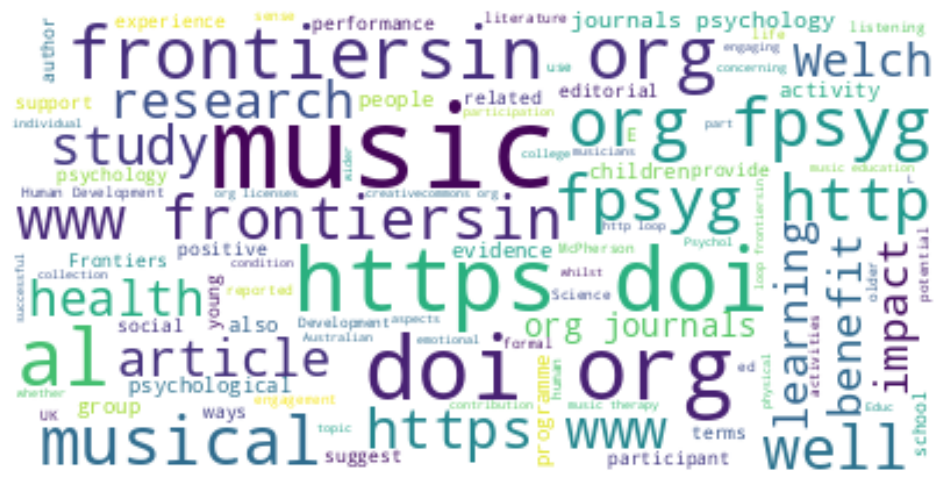

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white").generate(raw['content'])

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see that music, musical, research are very distinctively prominent in the word cloud (among the more common words). Perhaps, with stemming and further processing like removing things like doi, https and www which are irrelevant, our word cloud could be even better.

### Question 3 Twitter

In [1]:
# import tweepy as tw
import json
import pandas as pd
import numpy as np
from textblob import TextBlob

#### part a

In [2]:
twittertext = open('twittertext', 'r')

In [3]:
positive = 0
negative = 0
neutral = 0


with open('twittertext', 'r') as file:
  tweets = file.read().split('\n')
  for tweet_text in tweets:

        # Perform sentiment analysis
        txt = TextBlob(tweet_text)

        # Count positive and negative sentiments
        if txt.sentiment.polarity > 0:
            positive += 1
        elif txt.sentiment.polarity < 0:
            negative += 1
        elif txt.sentiment.polarity == 0:
            neutral +=1

        # Print the tweet and its sentiment
        print(f'Tweet: {tweet_text}')
        print(f'Sentiment: {txt.sentiment}\n')

# Display total positive and negative sentiment counts
print(f'Total Positive Sentiments: {positive}')
print(f'Total Negative Sentiments: {negative}')
print(f'Total Neutral Sentiments: {neutral}')

Tweet: 1. When the music stops and all these people lose their jobs, where will they end up
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Tweet: 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Tweet: 2. ‼️‼️JK & Usher's music video will be released Friday, Dec. 15 Please support because JK has worked very hard before he entered Ms‼️‼️
Sentiment: Sentiment(polarity=-0.3791666666666667, subjectivity=0.7041666666666666)

Tweet: 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Tweet: 3. I think Santa may be getting a late addition to my List. Wow! Being in my Top 5 all time favourite albums, I just have to….. Merry Christmas and thank you for all the fabulous music you create xx
Sentiment: Sentiment(polarity=0.18125000000000002, subjectivity=0.775)

Tweet: 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Tweet: 4. I need music! Send your links ASAP! 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Tweet: 
Sentiment: Sentiment(polarity=0.0, subjectivity=0.0)

Example of a positive tweet:
i’m so glad that 3racha are finally getting recognised for their amazing talents, first they got nominated for best producer/arranger for the asian pop music awards, and now they actually won “best creator” at AAA

Example of a negative tweet:
The most annoying thing is that, aside Twe Twe, Holy Ghost, the rest of the songs on that top 10 Apple Music are useless songs. Umbrella deserves number one and it’s really sad to see those who put genuine work into promoting their songs getting relegated by ‘stream farmers’.

Sentiment(polarity=-0.06666666666666667, subjectivity=0.6) was the score given for the negative comment which makes sense as it is infact a negative comment. The tweeter is very angry clearly in the tweet

Sentiment(polarity=0.41875, subjectivity=0.49166666666666664) was the score given for the positive tweet which makes sense again as it is infact a positive comment. It only has positive emotions.
